## Imports and setup

In [10]:
%matplotlib inline
import os
import incense
from incense import ExperimentLoader
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd

#name is main_visual

def get_mongo_uri():
    in_devcontainer = os.environ.get("TERM_PROGRAM") == "vscode"
    if in_devcontainer:
        return "mongodb://mongo:27017"
    else:
        return None
    
loader = ExperimentLoader(mongo_uri=get_mongo_uri(), db_name='sacred')

## Load experiments

In [2]:
# Sort by name

query = {"$and": [{"config.name": "obsint"}, {"config.dev": False}]}
simple_example_obsint_set = loader.find(query)

query = {"$and": [{"config.name": "obs"}, {"config.dev": False}]}
simple_example_obs_set = loader.find(query)

query = {"$and": [{"config.name": "confounded"}, {"config.dev": False}]}
simple_example_confounded_set = loader.find(query)

query = {"$and": [{"config.name": "int"}, {"config.dev": False}]}
simple_example_int_set = loader.find(query)

#simple_example_obsint_set = loader.find_by_config_key('name', 'simple_example_obsint', 'dev', 'False')
#simple_example_obs_set = loader.find_by_config_key('name', 'simple_example_obs')
#simple_example_confounded_set = loader.find_by_config_key('name', 'simple_example_confounded')
#simple_example_int_set = loader.find_by_config_key('name', 'simple_example_int')

In [3]:
T = int(simple_example_confounded_set[0].config.epochs/50)-1
mean_reward_conf = np.zeros((len(simple_example_confounded_set), T))
for idx,exp in enumerate(simple_example_confounded_set):
    mean_reward_conf[idx] = exp.metrics['training.mean_reward']

In [4]:
simple_example_obs_set

QuerySet([Experiment(id=84, name=main_confounding), Experiment(id=85, name=main_confounding), Experiment(id=86, name=main_confounding), Experiment(id=87, name=main_confounding), Experiment(id=88, name=main_confounding), Experiment(id=89, name=main_confounding), Experiment(id=90, name=main_confounding), Experiment(id=91, name=main_confounding), Experiment(id=92, name=main_confounding), Experiment(id=93, name=main_confounding)])

In [5]:
#Get metrics
T = int(simple_example_confounded_set[0].config.epochs/50)-1
mean_reward_conf = np.zeros((len(simple_example_confounded_set), T))
for idx,exp in enumerate(simple_example_confounded_set):
    mean_reward_conf[idx] = exp.metrics['training.mean_reward']
    
T = int(simple_example_obsint_set[0].config.epochs/50)
mean_reward_obsint = np.zeros((len(simple_example_obsint_set), T))
for idx,exp in enumerate(simple_example_obsint_set):
    L = len(exp.metrics['training.mean_reward'])
    mean_reward_obsint[idx,:L] = exp.metrics['training.mean_reward']
        
T = int(simple_example_obs_set[0].config.epochs/50)
mean_reward_obs = np.zeros((len(simple_example_obs_set), T))
for idx,exp in enumerate(simple_example_obs_set):
    L = len(exp.metrics['training.mean_reward'])
    mean_reward_obs[idx,:L] = exp.metrics['training.mean_reward']

T = int(simple_example_int_set[0].config.epochs/50)
mean_reward_int = np.zeros((len(simple_example_int_set), T))
for idx,exp in enumerate(simple_example_int_set):
    L = len(exp.metrics['training.mean_reward'])
    mean_reward_int[idx,:L] = exp.metrics['training.mean_reward']
   

Text(0.5, 1.0, 'Confounded learning')

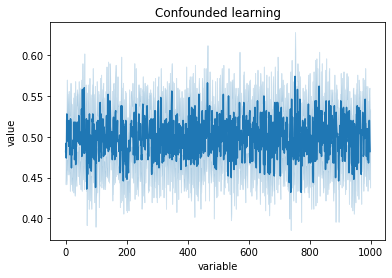

In [6]:
df = pd.DataFrame(mean_reward_conf).melt()
sns.lineplot(x="variable", y="value", data=df)
plt.title('Confounded learning')

Text(0.5, 1.0, 'Observational learning')

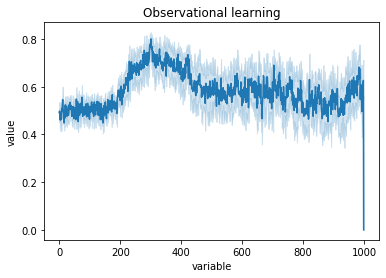

In [7]:
#Plot metrics for each condition
df = pd.DataFrame(mean_reward_obs).melt()
sns.lineplot(x="variable", y="value", data=df)
plt.title('Observational learning')

Text(0.5, 1.0, 'Off-policy interventional learning')

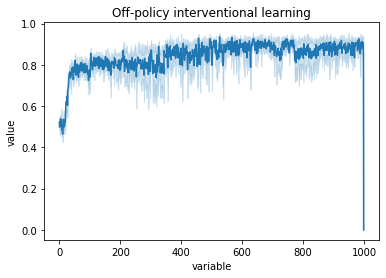

In [8]:
df = pd.DataFrame(mean_reward_obsint).melt()
sns.lineplot(x="variable", y="value", data=df)
plt.title('Off-policy interventional learning')

Text(0.5, 1.0, 'On-policy interventional learning')

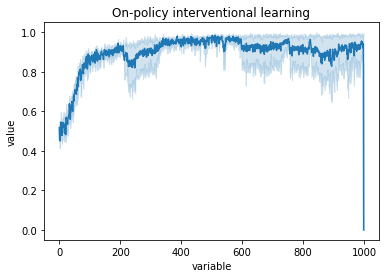

In [9]:
df = pd.DataFrame(mean_reward_int).melt()
sns.lineplot(x="variable", y="value", data=df)
plt.title('On-policy interventional learning')

## Restart analysis.... by deleting experiments

In [28]:
#exp = loader.find_by_id(2)
#exp.delete()

query = {"$and": [{"config.name": "simple_example_obsint",{"config.dev": False}}]}
simple_example_obsint_set = loader.find(query)
for exp in simple_example_obsint_set:
    exp.delete(confirmed=True)

query = {"$and": [{"config.name": "simple_example_obs"},{"config.dev": False}]}
simple_example_obs_set = loader.find(query)
for exp in simple_example_obs_set:
    exp.delete(confirmed=True)

query = {"$and": [{"config.name": "simple_example_confounded"}, {"config.dev": False}]}
simple_example_confounded_set = loader.find(query)
for exp in simple_example_confounded_set:
    exp.delete(confirmed=True)

query = {"$and": [{"config.name": "simple_example_int",{"config.dev": False}}]}
simple_example_int_set = loader.find(query)
for exp in simple_example_int_set:
    exp.delete(confirmed=True)

